# PCR via Classification

This has just been copied from experimental. Needs cleaning and whatever - K

## PCA

In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



X_df = pd.read_csv("x_classification_feature_reduced.csv")
y_df = pd.read_csv("y_classification_feature_reduced.csv")
X_df.drop(columns='Unnamed: 0', inplace=True)
y_df.drop(columns='Unnamed: 0', inplace=True)

X_df.head()

,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MinorAxisLength,original_shape_SurfaceVolumeRatio,original_firstorder_10Percentile,original_firstorder_Entropy,...,PgR_1.0,HER2_0.0,HER2_1.0,ChemoGrade_2.0,Proliferation_1.0,Proliferation_3.0,LNStatus_0.0,LNStatus_1.0,Gene_0.0,Gene_1.0
0,0.267381,-0.140682,-0.403013,-0.166632,-0.192642,-0.390657,-0.547613,-0.285288,0.584190,-0.742843,...,False,True,False,True,True,False,True,False,False,True
1,-0.279687,0.397379,0.268021,0.039864,0.826795,0.469967,0.679372,-0.432346,0.830076,-0.963125,...,False,True,False,False,False,True,False,True,False,True
2,1.181468,-0.271987,-0.773350,-0.619094,-0.652343,-0.717275,-0.549531,-0.686096,0.171924,-0.529576,...,False,True,False,True,True,False,True,False,False,True
3,1.600698,0.264026,-0.627688,-0.354359,-0.381809,-0.514977,-0.140360,-0.653768,-0.117755,-0.137061,...,False,True,False,False,False,True,False,True,False,True
4,1.667782,-0.001525,-0.762760,-0.522597,-0.569057,-0.761473,-0.358092,-0.168040,-0.228877,0.065995,...,False,True,False,False,False,False,False,True,False,True


In [2]:
y_df.head()

,pCR (outcome)
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0


## experimented with differnent values for PCA, PCA does not increase accuracy 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

# Initialize PCA to keep 95% of the variance
pca = PCA(n_components=0.9999)  

# Fit and transform the training data
X_train_pca = pca.fit_transform(X_train)

# Transform the test data
X_test_pca = pca.transform(X_test)



# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Number of components:", pca.n_components_)


Explained variance ratio: [4.25962969e-01 1.34043974e-01 1.04817947e-01 9.42888726e-02
 4.86826648e-02 3.88324726e-02 2.40866383e-02 2.04378881e-02
 1.48358005e-02 1.13879884e-02 9.33781107e-03 9.01437668e-03
 7.98903534e-03 6.64451971e-03 6.11470012e-03 5.59669339e-03
 5.17543996e-03 4.71277926e-03 4.14529976e-03 4.05491204e-03
 2.55323864e-03 2.11235563e-03 1.86426345e-03 1.55607645e-03
 1.41200351e-03 1.28267892e-03 1.15930869e-03 1.07667760e-03
 9.70886304e-04 8.90323440e-04 5.88336363e-04 5.66258865e-04
 5.09755141e-04 4.53559971e-04 3.91260346e-04 3.54681280e-04
 2.90637430e-04 2.41111546e-04 2.33146895e-04 2.23436660e-04
 2.04019754e-04 1.53451822e-04 1.41212275e-04 1.05429574e-04
 9.20738793e-05 7.62223626e-05 6.14094578e-05 4.69580338e-05
 3.66778534e-05 3.37234834e-05 2.94902558e-05 2.56395821e-05
 2.09663994e-05]
Number of components: 53


In [5]:
# Train a classifier (e.g., Random Forest)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy after PCA:", accuracy)


/home/michael/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model accuracy after PCA: 0.8333333333333334


In [6]:
from sklearn.metrics import balanced_accuracy_score

accuracy = balanced_accuracy_score(y_test, y_pred)
print("Model balanced accuracy after PCA:", accuracy)

Model balanced accuracy after PCA: 0.5923076923076923


In [7]:
pca = PCA()
pca.fit(X_df)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative explained variance:", cumulative_variance)
print("Number of components:", pca.n_components_)


Cumulative explained variance: [0.42689793 0.56424492 0.67387561 0.75980263 0.80748284 0.84443875
 0.86827948 0.8891224  0.90402356 0.91595652 0.92569044 0.93459852
 0.94261165 0.94917088 0.95535483 0.96104473 0.96615525 0.97100456
 0.97542476 0.97958647 0.98209984 0.98411536 0.98605818 0.98763987
 0.98918405 0.99054348 0.99173653 0.99282711 0.99387598 0.99473127
 0.99538322 0.99595919 0.99647274 0.99694229 0.99737025 0.9977613
 0.99807261 0.99834092 0.9986051  0.99884169 0.99905871 0.9992205
 0.99935301 0.99947147 0.99957105 0.99965052 0.99971833 0.99976879
 0.9998049  0.99983808 0.99986735 0.99989557 0.99991777 0.99993712
 0.99995471 0.99996553 0.99997477 0.99998318 0.99998836 0.99999217
 0.99999458 0.99999633 0.99999734 0.99999825 0.9999988  0.99999918
 0.99999949 0.99999974 0.99999991 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.        ]
Number of components: 

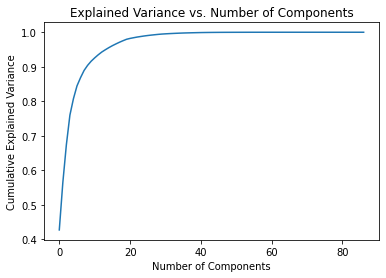

In [8]:
import matplotlib.pyplot as plt

plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()


# Model Development without PCA


/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

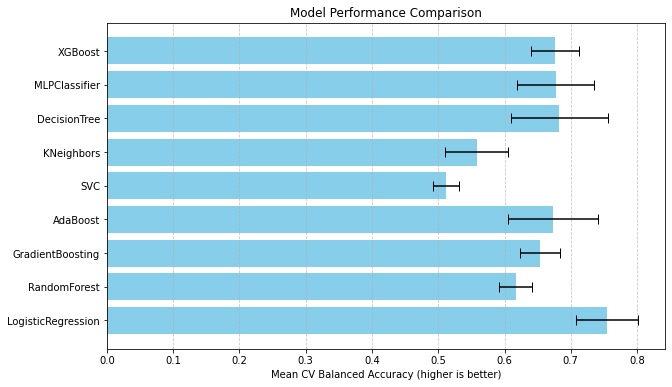

Best Model: LogisticRegression
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93        65
         1.0       0.67      0.46      0.55        13

    accuracy                           0.87        78
   macro avg       0.78      0.71      0.74        78
weighted avg       0.86      0.87      0.86        78



/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, make_scorer, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.base import TransformerMixin


# Define different classifiers
classifiers = {
    'LogisticRegression': LogisticRegression(max_iter=500, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42),
    'SVC': SVC(kernel='rbf', probability=True, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'MLPClassifier': MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=500, random_state=42),
    'XGBoost': xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}


# Define a custom scoring metric (Accuracy in this case)
accuracy_scorer = make_scorer(balanced_accuracy_score)# Create pipelines for each classifier


results = {}

for classifier in classifiers.keys():
    # print(f"Running Cross-Validation for {classifier}...")
    
    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(classifiers[classifier], X_train, y_train, cv=5, scoring=accuracy_scorer, n_jobs=-1)
    
    # Store results
    results[classifier] = {
        'cv_scores': cv_scores,
        'cv_mean_accuracy': cv_scores.mean(),
        'cv_std_accuracy': cv_scores.std()
    }
    
    # print(f"Model: {classifier}")
    # print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    # print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
    # print(f"Standard Deviation of CV Accuracy: {cv_scores.std():.4f}")
    # print()

# Visualize results
model_names = list(results.keys())
cv_mean_accuracy = [results[name]['cv_mean_accuracy'] for name in model_names]
cv_std_accuracy = [results[name]['cv_std_accuracy'] for name in model_names]

# Bar plot for cross-validation results
plt.figure(figsize=(10, 6))
plt.barh(model_names, cv_mean_accuracy, xerr=cv_std_accuracy, color='skyblue', capsize=5)
plt.xlabel('Mean CV Balanced Accuracy (higher is better)')
plt.title('Model Performance Comparison')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Fit and evaluate the best model (based on mean accuracy) on the validation set
best_model_name = max(results, key=lambda name: results[name]['cv_mean_accuracy'])
best_pipeline = classifiers[best_model_name]
best_pipeline.fit(X_train, y_train)

# Predict on the validation set
y_pred = best_pipeline.predict(X_test)

# Print classification report
print(f"Best Model: {best_model_name}")
print(classification_report(y_test, y_pred))


# Model Development with PCA

/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

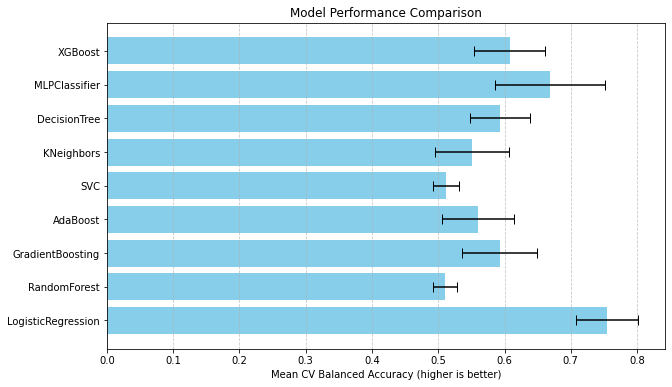

/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=500, random_state=42)

In [18]:
# Define different classifiers
classifiers = {
    'LogisticRegression': LogisticRegression(max_iter=500, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42),
    'SVC': SVC(kernel='rbf', probability=True, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'MLPClassifier': MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=500, random_state=42),
    'XGBoost': xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}


# Define a custom scoring metric (Accuracy in this case)
accuracy_scorer = make_scorer(balanced_accuracy_score)# Create pipelines for each classifier


results = {}

for classifier in classifiers.keys():
    #print(f"Running Cross-Validation for {classifier}...")
    
    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(classifiers[classifier], X_train_pca, y_train, cv=5, scoring=accuracy_scorer, n_jobs=-1)
    
    # Store results
    results[classifier] = {
        'cv_scores': cv_scores,
        'cv_mean_accuracy': cv_scores.mean(),
        'cv_std_accuracy': cv_scores.std()
    }
    
    # print(f"Model: {classifier}")
    # print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    # print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
    # print(f"Standard Deviation of CV Accuracy: {cv_scores.std():.4f}")
    # print()

# Visualize results
model_names = list(results.keys())
cv_mean_accuracy = [results[name]['cv_mean_accuracy'] for name in model_names]
cv_std_accuracy = [results[name]['cv_std_accuracy'] for name in model_names]

# Bar plot for cross-validation results
plt.figure(figsize=(10, 6))
plt.barh(model_names, cv_mean_accuracy, xerr=cv_std_accuracy, color='skyblue', capsize=5)
plt.xlabel('Mean CV Balanced Accuracy (higher is better)')
plt.title('Model Performance Comparison')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Fit and evaluate the best model (based on mean accuracy) on the validation set
best_model_name = max(results, key=lambda name: results[name]['cv_mean_accuracy'])
best_pipeline = classifiers[best_model_name]
best_pipeline.fit(X_train_pca, y_train)



## need to re do below graph with new data

In [11]:
# from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, classification_report

# # Initialize a dictionary to store ROC data
# roc_data = {}

# # Loop through models and evaluate ROC AUC
# plt.figure(figsize=(10, 8))
# for classifier in classifiers.keys():
#     # Fit the pipeline
#     classifiers[classifier].fit(X_train, y_train)
    
#     # Get predicted probabilities or decision scores
#     if hasattr(classifiers[classifier], "predict_proba"):
#         y_scores = classifiers[classifier].predict_proba(X_test)[:, 1]
#     else:  # For classifiers like SVM, use decision_function
#         y_scores = classifiers[classifier].decision_function(X_test)
    
#     # Compute ROC curve and AUC
#     fpr, tpr, thresholds = roc_curve(y_test, y_scores)
#     roc_auc = auc(fpr, tpr)
#     roc_data[classifier] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}
    
#     # Plot the ROC curve
#     plt.plot(fpr, tpr, label=f"{classifier} (AUC = {roc_auc:.2f})")

# # Plot diagonal line for random guess
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')

# # Add labels, title, and legend
# plt.title('ROC Curves for Classifiers', fontsize=16)
# plt.xlabel('False Positive Rate', fontsize=12)
# plt.ylabel('True Positive Rate', fontsize=12)
# plt.legend(loc='lower right')
# plt.grid()
# plt.show()

# # Print classification reports for all models
# for classifier in classifiers.keys():
#     y_pred = classifiers[classifier].predict(X_train)
#     print(f"Classification Report for {classifier}:\n")
#     print(classification_report(y_test, y_pred))
#     print("-" * 60)

## optimising xgboost 

In [ ]:
from sklearn.model_selection import GridSearchCV

#Best Parameters: {'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100} with best scores 0.7068452380952381
#Best Parameters: {'booster': 'gblinear', 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100} with best scores 0.742517006802721
#Best Parameters: {'booster': 'gblinear', 'learning_rate': 0.1, 'n_estimators': 110} with best scores 0.7404761904761904

params = {
    'n_estimators' :  np.arange(80,120,10), # how many tree make up the estimator
    'booster' : ['gblinear'], # different evaulation methods (linear or tree)
    'learning_rate' : [0.05, 0.1, 0.15],
          }


grid_search_cv = GridSearchCV(xgb.XGBClassifier(), param_grid=params, scoring='balanced_accuracy')
grid_search_cv.fit(X_train, y_train)


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'booster': ['gblinear'],
                         'learning_rate': [0.05, 0.1, 0.15],
                         'n_estimators': array([ 80,  90, 100, 110])},
             scoring='balanced_accuracy')

In [14]:
best_params = grid_search_cv.best_params_
print(f'Best Parameters: {best_params} with best scores {grid_search_cv.best_score_}')

Best Parameters: {'booster': 'gblinear', 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100} with best scores 0.742517006802721


In [16]:
best_params = grid_search_cv.best_params_
print(f'Best Parameters: {best_params} with best scores {grid_search_cv.best_score_}')

Best Parameters: {'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100} with best scores 0.7068452380952381


In [18]:
best_params = grid_search_cv.best_params_
print(f'Best Parameters: {best_params} with best scores {grid_search_cv.best_score_}')

Best Parameters: {'booster': 'gblinear', 'learning_rate': 0.1, 'n_estimators': 110} with best scores 0.7404761904761904
